In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

# import data

In [5]:
customer_data=pd.read_csv('D:/usha/ushasri/New folder/WhatsApp_files/New folder/customer_churn_data.csv')

In [6]:
cd=pd.DataFrame(customer_data)

In [7]:
cd.dropna(inplace=True) # dropna is about removing the NaN values in the datasets

In [8]:
cd.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes


In [9]:
cd.tail()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
991,992,24,Male,32,81.93,Month-to-Month,Fiber Optic,2621.76,Yes,Yes
993,994,38,Male,4,102.27,One-Year,Fiber Optic,409.08,No,Yes
994,995,34,Female,1,78.63,Month-to-Month,DSL,78.63,No,Yes
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes


In [10]:
cd.shape

(703, 10)

# Data preprocessing

In [11]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 997
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       703 non-null    int64  
 1   Age              703 non-null    int64  
 2   Gender           703 non-null    object 
 3   Tenure           703 non-null    int64  
 4   MonthlyCharges   703 non-null    float64
 5   ContractType     703 non-null    object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     703 non-null    float64
 8   TechSupport      703 non-null    object 
 9   Churn            703 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 60.4+ KB


In [12]:
cd.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,703.000000,703.000000,703.000000,703.000000,703.000000
mean,495.281650,44.516358,19.056899,73.802006,1400.382119
std,289.260306,9.875115,19.040358,26.037609,1576.590355
min,1.000000,12.000000,0.000000,30.000000,0.000000
25%,240.500000,38.000000,5.000000,51.070000,343.545000
50%,494.000000,45.000000,13.000000,73.560000,839.300000
75%,747.500000,51.000000,27.000000,95.775000,1948.780000
max,998.000000,83.000000,122.000000,119.960000,12416.250000


In [13]:
cd['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
cd.replace({'Gender':{'Male':0,'Female':1}},inplace=True)
cd=cd.infer_objects(copy=False)

In [16]:
cd['Gender'].unique()

array([0, 1], dtype=int64)

In [17]:
cd['ContractType'].unique()

array(['Month-to-Month', 'One-Year', 'Two-Year'], dtype=object)

In [19]:
cd.replace({'ContractType':{'Month-to-Month':0,'One-Year':1,'Two-Year':2}},inplace=True)
cd=cd.infer_objects(copy=False)

In [20]:
cd['ContractType'].unique()

array([0, 1, 2], dtype=int64)

In [21]:
cd['InternetService'].unique()

array(['Fiber Optic', 'DSL'], dtype=object)

In [23]:
cd.replace({'InternetService':{'Fiber Optic':1,'DSL':2}},inplace=True)
cd=cd.infer_objects(copy=False)

In [24]:
cd['InternetService'].unique()

array([1, 2], dtype=int64)

In [25]:
cd['TechSupport'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
cd.replace({'TechSupport':{'Yes':1,'No':0}},inplace=True)
cd=cd.infer_objects(copy=False)

In [54]:
cd['TechSupport'].unique()

array([1, 0], dtype=int64)

In [28]:
cd['Churn'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
cd.replace({'Churn':{'Yes':1,'No':0}},inplace=True)
cd=cd.infer_objects(copy=False) # infer_objects means string into int and copy(False) means just modify the dataframe not to copy another  new dataframe 

In [31]:
cd['Churn'].unique()

array([1, 0], dtype=int64)

In [32]:
cd.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,0,4,88.35,0,1,353.40,1,1
1,2,43,0,0,36.67,0,1,0.00,1,1
2,3,51,1,2,63.79,0,1,127.58,0,1
3,4,60,1,8,102.34,1,2,818.72,1,1
5,6,42,1,16,119.75,2,2,1916.00,1,1


# define feature and target

In [33]:
x=cd.drop(['Churn'],axis=1)
y=cd['Churn']

In [34]:
print(x,y)

     CustomerID  Age  Gender  Tenure  MonthlyCharges  ContractType  \
0             1   49       0       4           88.35             0   
1             2   43       0       0           36.67             0   
2             3   51       1       2           63.79             0   
3             4   60       1       8          102.34             1   
5             6   42       1      16          119.75             2   
..          ...  ...     ...     ...             ...           ...   
991         992   24       0      32           81.93             0   
993         994   38       0       4          102.27             1   
994         995   34       1       1           78.63             0   
995         996   42       0      41           37.14             0   
997         998   51       1      15          111.72             0   

     InternetService  TotalCharges  TechSupport  
0                  1        353.40            1  
1                  1          0.00            1  
2        

# train test split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.3,random_state=2529)

In [55]:
print(x.shape,x_train.shape,x_test.shape)

(703, 9) (492, 9) (211, 9)


# select model

In [56]:
from sklearn.linear_model import LogisticRegression

In [65]:
model=LogisticRegression(max_iter=2529) # max_iter is about the max iteration 

In [66]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=2529)

# prediction

In [67]:
train_pred=model.predict(x_train)

In [68]:
print(train_pred)

[1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 1]


In [69]:
test_pred=model.predict(x_test)

In [70]:
print(test_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


# accuracy

In [71]:
from sklearn import metrics

In [72]:
# accuracy_score
result_1= metrics.accuracy_score(y_train,train_pred)
result_2=metrics.accuracy_score(y_test,test_pred)
print('accuracy_score:',result_1)
print('accuracy_score:',result_2)

accuracy_score: 0.8922764227642277
accuracy_score: 0.9052132701421801


In [73]:
# precision score
precision_1=metrics.precision_score(y_test,test_pred)
print('precision_score:',precision_1)

precision_score: 0.9206349206349206


In [74]:
# recall score
recall_1=metrics.recall_score(y_test,test_pred)
print('recall_score:',recall_1)

recall_score: 0.9720670391061452


In [78]:
#confusion matrix
con_matrix=metrics.confusion_matrix(y_test,test_pred)
print('confusion_matrix:',con_matrix)

confusion_matrix: [[ 17  15]
 [  5 174]]


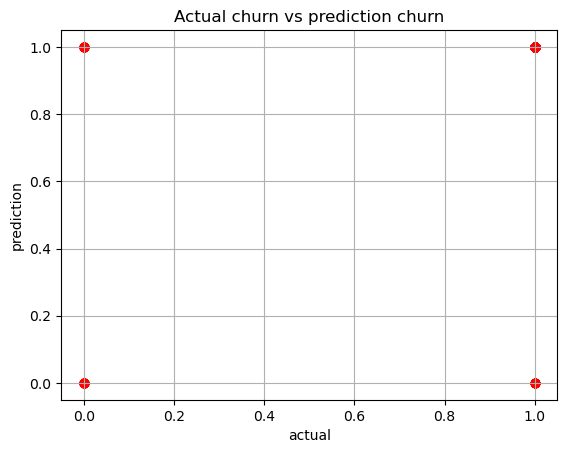

In [91]:
#scatter plot
plt.scatter(y_train,train_pred,label='Actual churn vs prediction churn',color='red')
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('Actual churn vs prediction churn')
plt.grid(True)
plt.show()

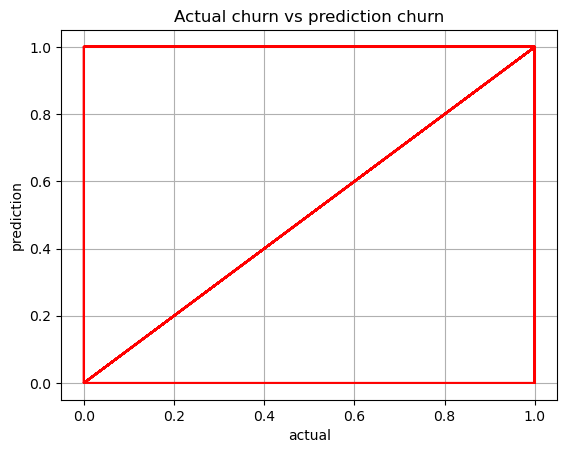

In [90]:
# line plot
plt.plot(y_test,test_pred,label='Actual churn vs prediction churn',color='red')
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('Actual churn vs prediction churn')
plt.grid(True)
plt.show()